In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# 1. Get the data

In [ ]:
# Change directory
os.chdir("C:/Users/Jamal/Desktop/ULL/Fall 20/INFX 598/INFX 598-Project/Codes/All data")
# Create a list with all the files
path = os.getcwd()
files = os.listdir(path)
# Select only xlsx files
files_xlsx = [f for f in files if f[-4:] == "xlsx"]

In [ ]:
cols = ['DEPT','RHOZ','GR_EDTC','AORT','DPHZ','NPHI','DTCO','DTSM','YM','PR','BI','Fracture toughness',
        'Minimum horizontal stress','FI']
lst = []
i=0
# Loop over list of Excel files
for f in files_xlsx:
    df=pd.read_excel(f,header=None,skiprows=1)
    lst.append(df)

df2=pd.concat(lst,axis=0)
df2.columns=cols

# 2. Explore the data

In [ ]:
df2.reset_index(drop=True,inplace=True)
df2.head()

,DEPT,RHOZ,GR_EDTC,AORT,DPHZ,NPHI,DTCO,DTSM,YM,PR,BI,Fracture toughness,Minimum horizontal stress,FI
0,10712.0,2.5477,225.2252,120.6288,0.0949,0.1439,3092.438339,2158.377308,24.332668,0.025078,9.413415,0.539690,48.799045,0.357431
1,10712.5,2.4275,327.9264,133.7183,0.1652,0.4590,3094.425668,2104.132466,22.999520,0.069999,13.338805,0.534794,50.327295,0.495595
2,10713.0,2.3373,388.6479,142.0983,0.2180,0.4224,3352.021661,2060.865861,23.748102,0.196148,36.445674,0.537543,55.527107,1.221034
3,10713.5,2.2909,378.2459,187.9962,0.2451,0.3028,3382.727668,1990.143306,22.417466,0.235326,39.417476,0.532657,57.492959,1.287142
4,10714.0,2.2905,363.8178,239.3053,0.2453,0.2764,3262.845312,1962.800803,21.468825,0.216454,33.710115,0.529174,56.525352,1.126987


In [ ]:
df2 = df2.sample(frac=1,random_state=42).reset_index(drop=True) #shuffle the data

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 14 columns):
DEPT                         1787 non-null float64
RHOZ                         1787 non-null float64
GR_EDTC                      1787 non-null float64
AORT                         1787 non-null float64
DPHZ                         1787 non-null float64
NPHI                         1787 non-null float64
DTCO                         1650 non-null float64
DTSM                         1787 non-null float64
YM                           1650 non-null float64
PR                           1650 non-null float64
BI                           1650 non-null float64
Fracture toughness           1650 non-null float64
Minimum horizontal stress    1650 non-null float64
FI                           1650 non-null float64
dtypes: float64(14)
memory usage: 195.5 KB


In [ ]:
df2.describe()

,DEPT,RHOZ,GR_EDTC,AORT,DPHZ,NPHI,DTCO,DTSM,YM,PR,BI,Fracture toughness,Minimum horizontal stress,FI
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000,1787.00000,1650.000000,1787.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,10295.198657,2.283486,395.532790,305.571822,0.249039,0.32581,3313.242660,1847.892796,20.167634,0.223546,37.044694,0.524396,54.709391,1.295502
std,619.072375,0.121418,122.202634,590.313083,0.070934,0.08610,6534.924058,247.999913,21.099358,0.622524,21.103108,0.077477,5.274046,0.770847
min,8147.000000,1.960300,151.806700,1.452810,-0.007800,0.00880,2433.016222,-65.211352,-486.163156,-17.769967,0.000000,-1.334851,6.722927,0.000000
25%,9877.750000,2.207300,305.313050,37.382050,0.221350,0.27860,2834.124627,1684.857107,15.791256,0.201029,22.867678,0.508325,52.441155,0.797663
50%,10550.500000,2.263200,397.142600,121.859000,0.260900,0.32935,3006.555536,1806.465439,18.181842,0.221242,33.343575,0.517104,55.338508,1.170189
75%,10686.750000,2.330750,468.544900,316.490065,0.293600,0.38130,3201.801445,1941.173159,21.153957,0.239132,45.245646,0.528017,57.544307,1.586413
max,11276.500000,2.723300,937.895700,7190.411100,0.414200,0.62780,267673.662949,2864.287466,506.071324,15.036766,100.000000,2.308634,77.688052,8.096475


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBCDB605C0>,
      dtype=object)

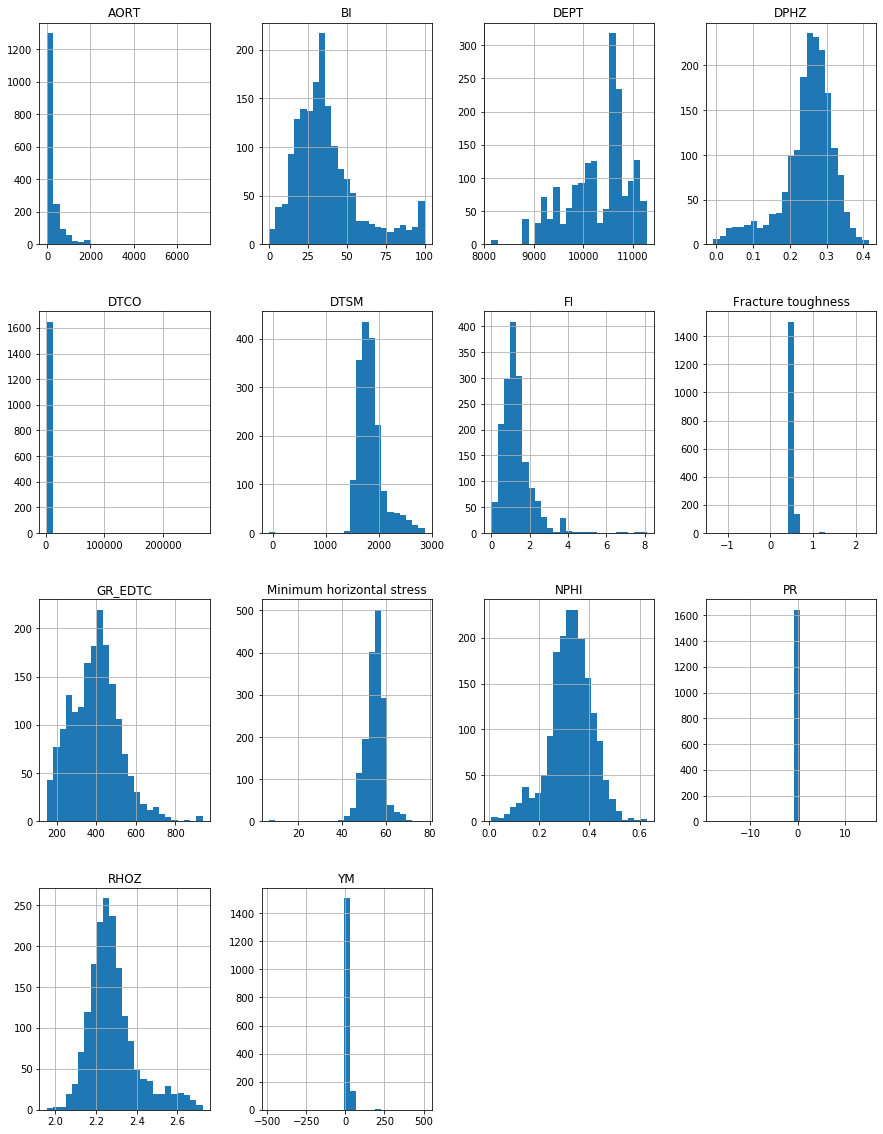

In [ ]:
df2.hist(bins=25,figsize=(15,20))

In [ ]:
def boxplot(df,n_row,n_col):
    f, axes = plt.subplots(n_row,n_col,figsize=(20,7))


    sns.boxplot(df["RHOZ"],orient='v',ax=axes[0])
    sns.boxplot(df["GR_EDTC"],orient='v',ax=axes[1])
    sns.boxplot(df["AORT"],orient='v',ax=axes[2])
    sns.boxplot(df["DPHZ"],orient='v',ax=axes[3])
    sns.boxplot(df["NPHI"],orient='v',ax=axes[4])
    sns.boxplot(df["DTCO"],orient='v',ax=axes[5])
    sns.boxplot(df["DTSM"],orient='v',ax=axes[6])

    plt.tight_layout()

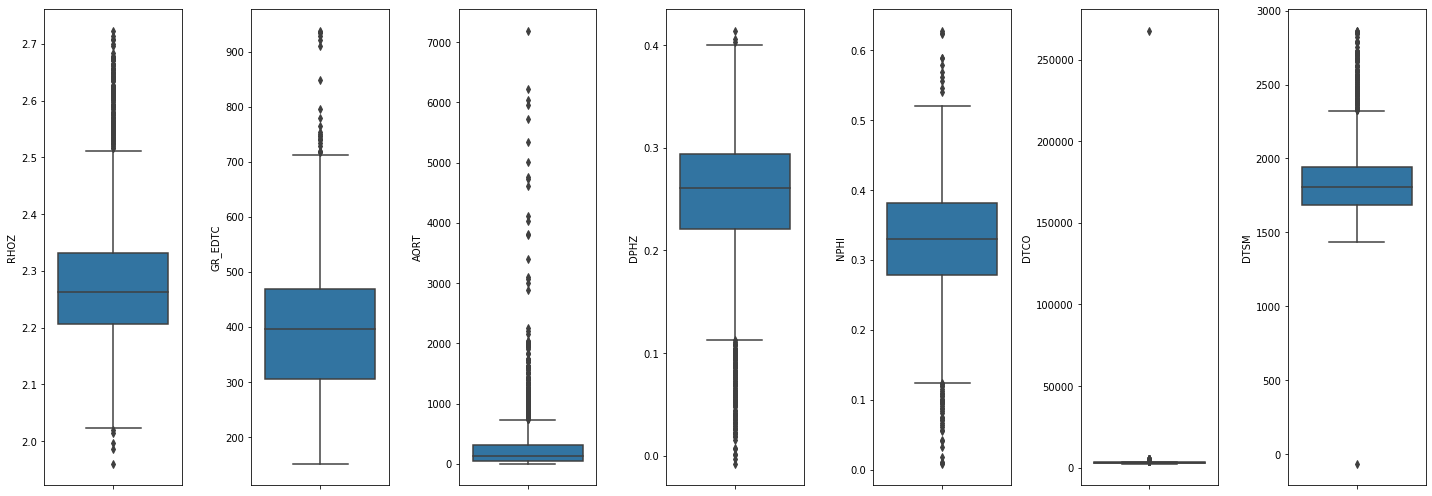

In [ ]:
boxplot(df2,1,7)

In [ ]:
df2.skew()

DEPT                         -0.698354
RHOZ                          1.116874
GR_EDTC                       0.495561
AORT                          5.616226
DPHZ                         -1.123025
NPHI                         -0.426963
DTCO                         40.195786
DTSM                          1.155550
YM                            1.055002
PR                           -5.841437
BI                            1.184996
Fracture toughness            1.055002
Minimum horizontal stress    -2.574010
FI                            2.310649
dtype: float64

# Cleaning the data

In [ ]:
def remove_outliers_index(property,lower_quant,upper_quant):
    if lower_quant>0 and upper_quant>0:
        dat=df2[property]
        P_uq=dat.quantile(upper_quant)
        P_lq=dat.quantile(lower_quant)
        index = df2[(dat >= P_uq)|(dat<=P_lq)].index
    elif lower_quant>0 and upper_quant==0:
        dat=df2[property]
        P_lq=dat.quantile(lower_quant)
        index = df2[dat<=P_lq].index
    else:
        dat=df2[property]
        P_uq=dat.quantile(upper_quant)
        index = df2[dat >= P_uq].index
    return index

In [ ]:
def remove_outliers_df(df):
    index_all=np.concatenate((remove_outliers_index("RHOZ",0.01,0.99),
    remove_outliers_index("AORT",0.01,0.99),
    remove_outliers_index("DPHZ",0.01,0.99),
    remove_outliers_index("NPHI",0.01,0.99),
    remove_outliers_index("DTCO",0,0.999),
    remove_outliers_index("DTSM",0.001,0),
    remove_outliers_index("YM",0.005,0.995),
    remove_outliers_index("PR",0.03,0.99),
    df[df['FI']>=3].index))

    unique_index=np.unique(index_all)
    df_f=df.drop(unique_index)
    return df_f

In [ ]:
df_mod=remove_outliers_df(df2)

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1786
Data columns (total 14 columns):
DEPT                         1591 non-null float64
RHOZ                         1591 non-null float64
GR_EDTC                      1591 non-null float64
AORT                         1591 non-null float64
DPHZ                         1591 non-null float64
NPHI                         1591 non-null float64
DTCO                         1470 non-null float64
DTSM                         1591 non-null float64
YM                           1470 non-null float64
PR                           1470 non-null float64
BI                           1470 non-null float64
Fracture toughness           1470 non-null float64
Minimum horizontal stress    1470 non-null float64
FI                           1470 non-null float64
dtypes: float64(14)
memory usage: 186.4 KB


In [ ]:
df_mod.skew()

DEPT                        -0.715980
RHOZ                         1.080136
GR_EDTC                      0.300273
AORT                         2.641938
DPHZ                        -1.068114
NPHI                        -0.311625
DTCO                         2.101757
DTSM                         1.467055
YM                           2.126055
PR                           0.956983
BI                           1.131902
Fracture toughness           2.126055
Minimum horizontal stress    0.031439
FI                           0.581464
dtype: float64

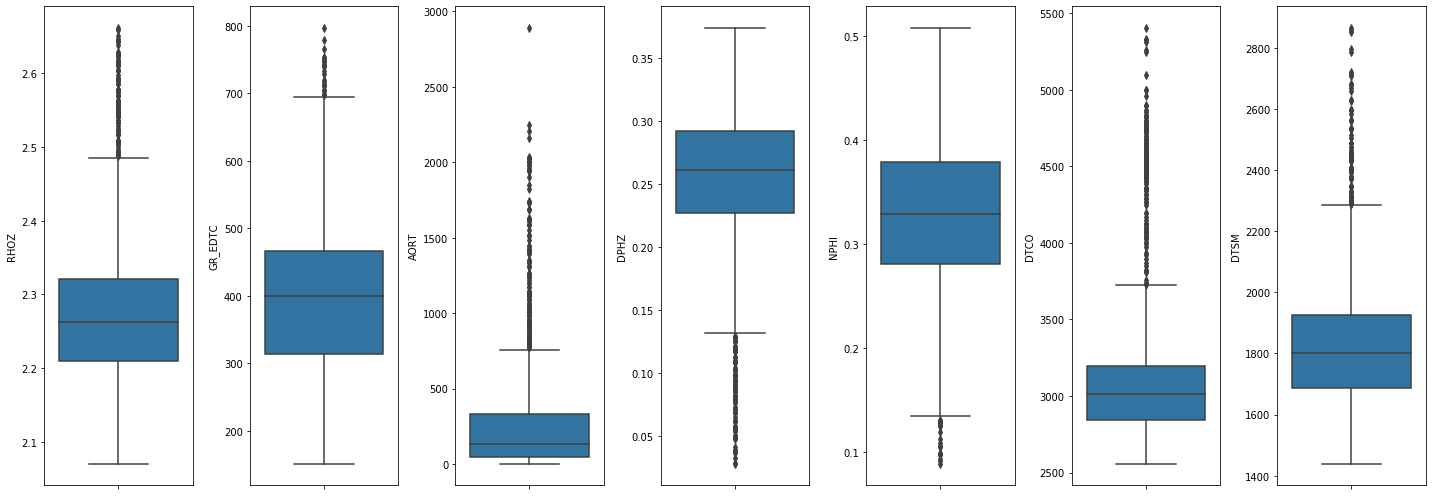

In [ ]:
boxplot(df_mod,1,7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBD0B07160>,
      dtype=object)

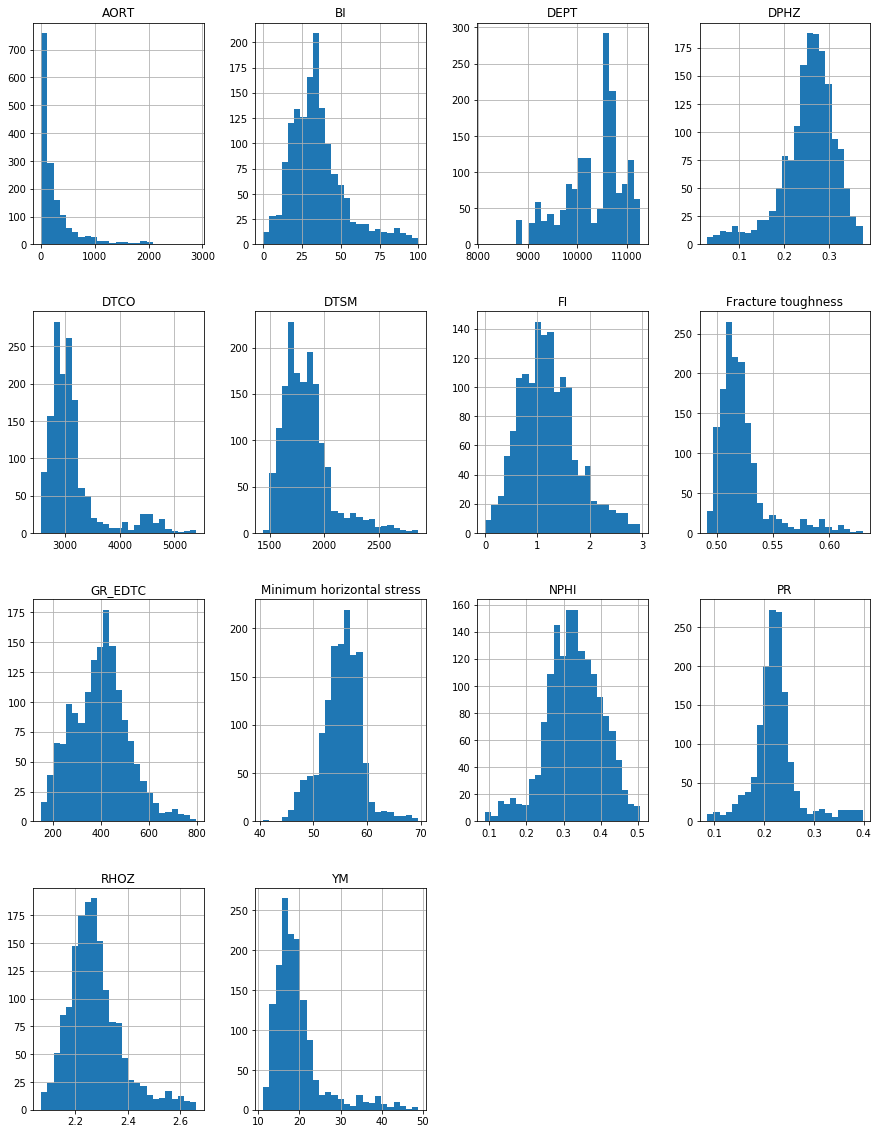

In [ ]:
df_mod.hist(bins=25,figsize=(15,20))

In [ ]:
df_mod.describe()

,DEPT,RHOZ,GR_EDTC,AORT,DPHZ,NPHI,DTCO,DTSM,YM,PR,BI,Fracture toughness,Minimum horizontal stress,FI
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1470.000000,1591.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,10331.229415,2.276323,396.901478,277.674500,0.253258,0.328077,3135.954091,1834.940748,19.509407,0.223765,35.095297,0.521979,55.222388,1.205298
std,594.639525,0.103288,113.892759,389.251813,0.060501,0.073337,503.658867,220.501689,6.134640,0.047271,17.831313,0.022526,3.771859,0.548748
min,8147.500000,2.070700,151.806700,3.314900,0.028500,0.089000,2558.723244,1439.977323,11.176477,0.085549,0.000000,0.491380,40.660335,0.000000
25%,9981.750000,2.209950,313.586800,43.537400,0.227500,0.281000,2842.579572,1686.223611,15.870819,0.202259,22.948867,0.508618,53.099586,0.800148
50%,10558.000000,2.262300,400.493000,133.017400,0.261300,0.328700,3013.702587,1801.742157,18.149134,0.220990,32.838655,0.516984,55.510913,1.147763
75%,10692.250000,2.320350,466.319900,333.504455,0.292000,0.378950,3196.246162,1926.440690,20.853791,0.237806,42.000874,0.526915,57.612557,1.529797
max,11276.500000,2.661200,796.524800,2888.868900,0.373800,0.507260,5401.937467,2864.166347,48.929654,0.397912,100.000000,0.630010,69.597763,2.972495


In [ ]:
df_f=df_mod.dropna()
df_f.reset_index(drop=True,inplace=True)

In [ ]:
df_f['AORT']=np.log2(df_f['AORT'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
corrMatrix=df_f.corr()
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(corrMatrix[corrMatrix>0.5],annot=True,ax=ax)
corrMatrix.round(2)

,DEPT,RHOZ,GR_EDTC,AORT,DPHZ,NPHI,DTCO,DTSM,YM,PR,BI,Fracture toughness,Minimum horizontal stress,FI
DEPT,1.00,0.35,0.02,0.26,-0.36,-0.40,0.12,0.23,0.21,-0.11,-0.16,0.21,0.75,-0.34
RHOZ,0.35,1.00,-0.32,-0.34,-1.00,-0.75,0.56,0.64,0.72,0.10,0.40,0.72,0.37,0.26
GR_EDTC,0.02,-0.32,1.00,-0.19,0.32,0.23,0.05,0.04,-0.04,-0.01,-0.14,-0.04,0.02,-0.15
AORT,0.26,-0.34,-0.19,1.00,0.34,0.26,-0.53,-0.50,-0.53,-0.20,-0.42,-0.53,0.06,-0.38
DPHZ,-0.36,-1.00,0.32,0.34,1.00,0.76,-0.56,-0.64,-0.72,-0.10,-0.40,-0.72,-0.37,-0.26
NPHI,-0.40,-0.75,0.23,0.26,0.76,1.00,-0.44,-0.57,-0.59,0.01,-0.27,-0.59,-0.32,-0.15
DTCO,0.12,0.56,0.05,-0.53,-0.56,-0.44,1.00,0.85,0.91,0.56,0.64,0.91,0.50,0.47
DTSM,0.23,0.64,0.04,-0.50,-0.64,-0.57,0.85,1.00,0.97,0.08,0.46,0.97,0.27,0.32
YM,0.21,0.72,-0.04,-0.53,-0.72,-0.59,0.91,0.97,1.00,0.26,0.58,1.00,0.37,0.41
PR,-0.11,0.10,-0.01,-0.20,-0.10,0.01,0.56,0.08,0.26,1.00,0.53,0.26,0.58,0.42


# Creating a test set

In [ ]:
def strat_split(df_f,test):
    df_f["fi_cat"] = pd.cut(df_f["FI"],bins=[0, 1, 2, 3, np.inf],labels=[1, 2, 3, 4])
    df_f.dropna(inplace=True)
    df_f.reset_index(drop=True,inplace=True)
    split = StratifiedShuffleSplit(n_splits=1, test_size=test, random_state=42)
    for train_index, test_index in split.split(df_f, df_f["fi_cat"]):
        strat_train_set = df_f.loc[train_index]
        strat_test_set = df_f.loc[test_index]

    strat_prop=strat_test_set["fi_cat"].value_counts() / len(strat_test_set)
    full_data=df_f["fi_cat"].value_counts() / len(df_f)
    train_set, test_set = train_test_split(df_f, test_size=0.2, random_state=42)
    random=test_set["fi_cat"].value_counts() / len(test_set)
    compare=pd.concat([full_data,strat_prop,random],axis=1)
    compare.columns=['Full dataset','Stratified sampling','Random sampling']

    strat_train_set=strat_train_set.drop(['fi_cat'],axis=1)
    strat_test_set=strat_test_set.drop(['fi_cat'],axis=1)

    return strat_train_set, strat_test_set,compare

In [ ]:
train_set, test_set,sampling_table=strat_split(df_f,0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sampling_table

,Full dataset,Stratified sampling,Random sampling
2,0.540504,0.540816,0.520408
1,0.373724,0.374150,0.391156
3,0.085773,0.085034,0.088435
4,0.000000,0.000000,0.000000


In [ ]:
# train_set.to_excel("Train set.xlsx")
# test_set.to_excel("Test set.xlsx")

In [ ]:
X_train=train_set[['RHOZ','GR_EDTC','AORT','DPHZ','NPHI','DTCO']]
X_test=test_set[['RHOZ','GR_EDTC','AORT','DPHZ','NPHI','DTCO']]
y_train=train_set['FI']
y_test=test_set['FI']

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

## Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
def cross_val(model_name,model_input):

    model=model_input

    #Whole training dataset
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_train_scaled)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    graph=plt.scatter(y_train, predictions)

    #Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train,scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)

    print("RMSE on whole training set:", rmse)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("Standard deviation:", rmse_scores.std())

    joblib.dump(model, model_name+'.pkl', compress=1)

    return graph

### Linear regression

RMSE on whole training set: 0.4607867911625439
Scores: [0.47596989 0.46881092 0.42641213 0.45564907 0.48911484]
Mean: 0.46319136903979397
Standard deviation: 0.021337737207784185


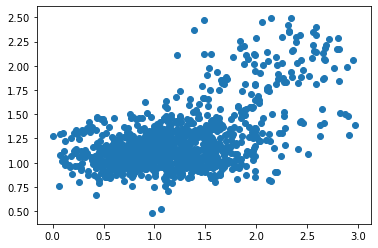

In [ ]:
lin_reg = LinearRegression()
cross_val('lin_reg',lin_reg)

### Ridge regression

RMSE on whole training set: 0.46090562731059825
Scores: [0.47613783 0.46884974 0.42679556 0.4553404  0.48939075]
Mean: 0.4633028558308311
Standard deviation: 0.021317909891446454


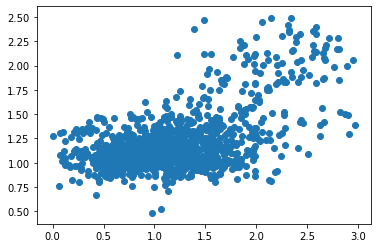

In [ ]:
ridge_reg = Ridge(alpha=1)
cross_val('ridge_reg',ridge_reg)

### Lasso regression

RMSE on whole training set: 0.46227499152780716
Scores: [0.48073813 0.46877992 0.43047656 0.45621524 0.48639161]
Mean: 0.46452029255151867
Standard deviation: 0.019937235310815996


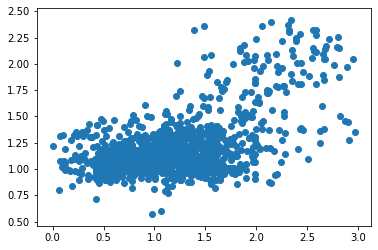

In [ ]:
lasso_reg = Lasso(alpha=0.01)
cross_val('lasso_reg',lasso_reg)

In [ ]:
lasso_loaded = joblib.load("lasso_reg.pkl")
pd.DataFrame(X_train.columns,lasso_loaded.coef_)

,0
-0.009836,RHOZ
-0.126844,GR_EDTC
-0.118624,AORT
0.000000,DPHZ
0.051344,NPHI
0.221321,DTCO


### Decision tree

RMSE on whole training set: 1.3048566956140885e-05
Scores: [0.57870248 0.5599256  0.46808322 0.52830219 0.53827924]
Mean: 0.5346585451858623
Standard deviation: 0.03758744119195196


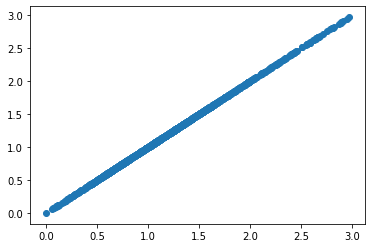

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
cross_val('tree_reg',tree_reg)

In [ ]:
tree_loaded = joblib.load("tree_reg.pkl")
tree_loaded.tree_.max_depth

31

RMSE on whole training set: 0.2858068856957659
Scores: [0.53107571 0.47799525 0.45433785 0.5395544  0.51874607]
Mean: 0.5043418562445534
Standard deviation: 0.032731172687471326


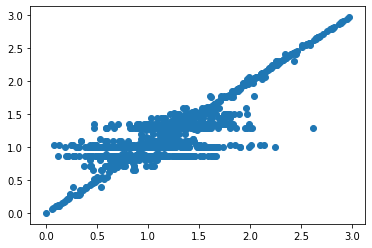

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42,max_depth=10)
cross_val('tree_reg',tree_reg)

### SVM

In [ ]:
from sklearn.svm import SVR

RMSE on whole training set: 0.4633667274023429
Scores: [0.47648433 0.47189885 0.42680804 0.45411638 0.50031312]
Mean: 0.46592414422417594
Standard deviation: 0.024492077401286925


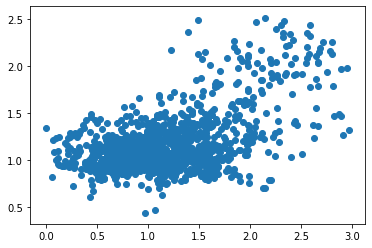

In [ ]:
svm_reg_lin=SVR(kernel='linear',C=100) #Linear
cross_val('svm_reg_lin',svm_reg_lin)

RMSE on whole training set: 0.4569836852845962
Scores: [0.49844054 0.46707495 0.44577376 0.4558532  0.46421586]
Mean: 0.46627166191316755
Standard deviation: 0.017711109101961244


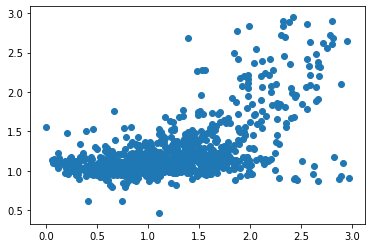

In [ ]:
svm_reg_poly=SVR(kernel='poly',degree=2,C=100) #Polynomial
cross_val('svm_reg_poly',svm_reg_poly)

RMSE on whole training set: 0.3868329204099393
Scores: [0.44624816 0.42538121 0.38659916 0.4348285  0.44453192]
Mean: 0.42751779085977304
Standard deviation: 0.021783725099046268


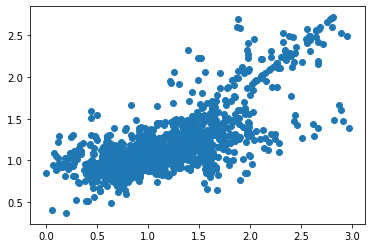

In [ ]:
svm_reg_rbf=SVR(kernel='rbf',degree=3,gamma='scale') #RBF
cross_val('svm_reg_rbf',svm_reg_rbf)

### Random Forest

RMSE on whole training set: 0.36030115181219247
Scores: [0.46127274 0.42670877 0.39130678 0.42320493 0.44686345]
Mean: 0.4298713318959383
Standard deviation: 0.023733719939733593


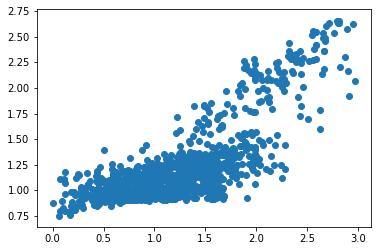

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(max_depth=6,n_estimators=1000,random_state=42)
cross_val('rf_reg',rf_reg)

## Fine-tuning models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
def fine_tune(params,model):
    grid_search_cv = GridSearchCV(model, params, verbose=1, cv=5,scoring='neg_mean_squared_error',refit=True,
                                 return_train_score=True)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_mod=grid_search_cv.best_estimator_
    best_score=grid_search_cv.best_score_
    best_rmse=np.sqrt(-best_score)
    cvres = grid_search_cv.cv_results_
    for mean_score,mean_train_score, params in zip(cvres["mean_test_score"], cvres["mean_train_score"], cvres["params"]):
        print(np.sqrt(-mean_score), np.sqrt(-mean_train_score), params)
    return best_mod, best_rmse

### Decision tree fine-tune

In [ ]:
params = {'max_depth': list(range(6, 10)),'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': [1, 2, 3]}
fine_tune(params,DecisionTreeRegressor(random_state=42))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError

nan nan {'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_split': 1}
0.4708835355386371 0.46942628681890586 {'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.4708835355386371 0.46942628681890586 {'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_split': 3}
nan nan {'max_depth': 6, 'max_leaf_nodes': 3, 'min_samples_split': 1}
0.46906116742864745 0.46053682004583457 {'max_depth': 6, 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.46906116742864745 0.46053682004583457 {'max_depth': 6, 'max_leaf_nodes': 3, 'min_samples_split': 3}
nan nan {'max_depth': 6, 'max_leaf_nodes': 4, 'min_samples_split': 1}
0.45992727297015507 0.45197793039294965 {'max_depth': 6, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.45992727297015507 0.45197793039294965 {'max_depth': 6, 'max_leaf_nodes': 4, 'min_samples_split': 3}
nan nan {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_split': 1}
0.45703567183314264 0.445801266356024 {'max_depth': 6, 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.45703567

(DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'), 0.45703567183314264)

### SVM fine tune

In [ ]:
params_svm = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
fine_tune(params_svm,SVR())

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.45789892828694756 0.41229056600120056 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.44275540203284003 0.4329405700481851 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.45633705710224 0.45354794736393267 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.520240155073774 0.5189166575762528 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5508933498132816 0.5503021864913797 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.40551898211176174 0.2682886606553359 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.4344224212116794 0.4078575349620296 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.4488155924739802 0.4435319653083737 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.4660428663758641 0.46329345521793863 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5206035336412566 0.5192086925251123 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.42779218742448066 0.18555987111677033 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.43297481610606714 0.3727293239947173 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.4472097159805748 0.43685945134814147 {

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:  4.4min finished


(SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 0.40551898211176174)

### Random Forest

In [ ]:
params_rf = [{'n_estimators': [30,50,70,90,110], 'max_depth': [5,7,9],'min_samples_leaf': [1,3,5]}]
fine_tune(params_rf,RandomForestRegressor())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.6min finished


0.43888072730946853 0.3807273574603122 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 30}
0.4368961222242324 0.3807177632185709 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
0.4392469280328181 0.3784050485598942 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 70}
0.43883707657017273 0.37987062969906005 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 90}
0.4372398669598988 0.37949457670635495 {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 110}
0.44078709926379384 0.3829464539589663 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 30}
0.4406555642157024 0.3827365970742381 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 50}
0.436604797465452 0.38219898401367675 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 70}
0.43842998202395284 0.38181412038966245 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 90}
0.4371520842052825 0.3816562828538259 {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 110}
0.436329078

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 0.41149830460783043)

RMSE on whole training set: 0.2876994820044618
Scores: [0.4516114  0.41249813 0.37355791 0.40694274 0.43082078]
Mean: 0.41508618998217184
Standard deviation: 0.025997232613844744


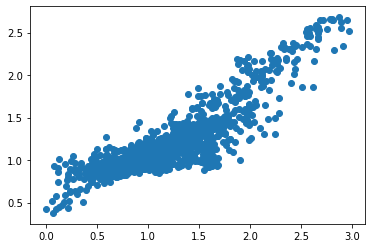

In [ ]:
rf_reg=RandomForestRegressor(max_depth=9,n_estimators=90,min_samples_leaf=1,random_state=42)
cross_val('rf_reg',rf_reg)

## Predict test set

In [ ]:
best_svm,best_svm_rmse=fine_tune(params_svm,SVR())

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.45789892828694756 0.41229056600120056 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.44275540203284003 0.4329405700481851 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.45633705710224 0.45354794736393267 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.520240155073774 0.5189166575762528 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5508933498132816 0.5503021864913797 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.40551898211176174 0.2682886606553359 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.4344224212116794 0.4078575349620296 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.4488155924739802 0.4435319653083737 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.4660428663758641 0.46329345521793863 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.5206035336412566 0.5192086925251123 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.42779218742448066 0.18555987111677033 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.43297481610606714 0.3727293239947173 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.4472097159805748 0.43685945134814147 {

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:  4.4min finished


In [ ]:
final_predictions=best_svm.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.36649407585856775

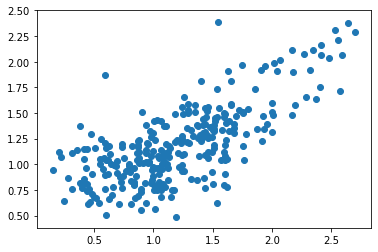

In [ ]:
plt.scatter(y_test, final_predictions)